In [3]:
import pandas as pd
from dataset_visualisation import kde_plots

In [4]:
dataset = pd.read_csv("../dataset/essay_dataset.csv")

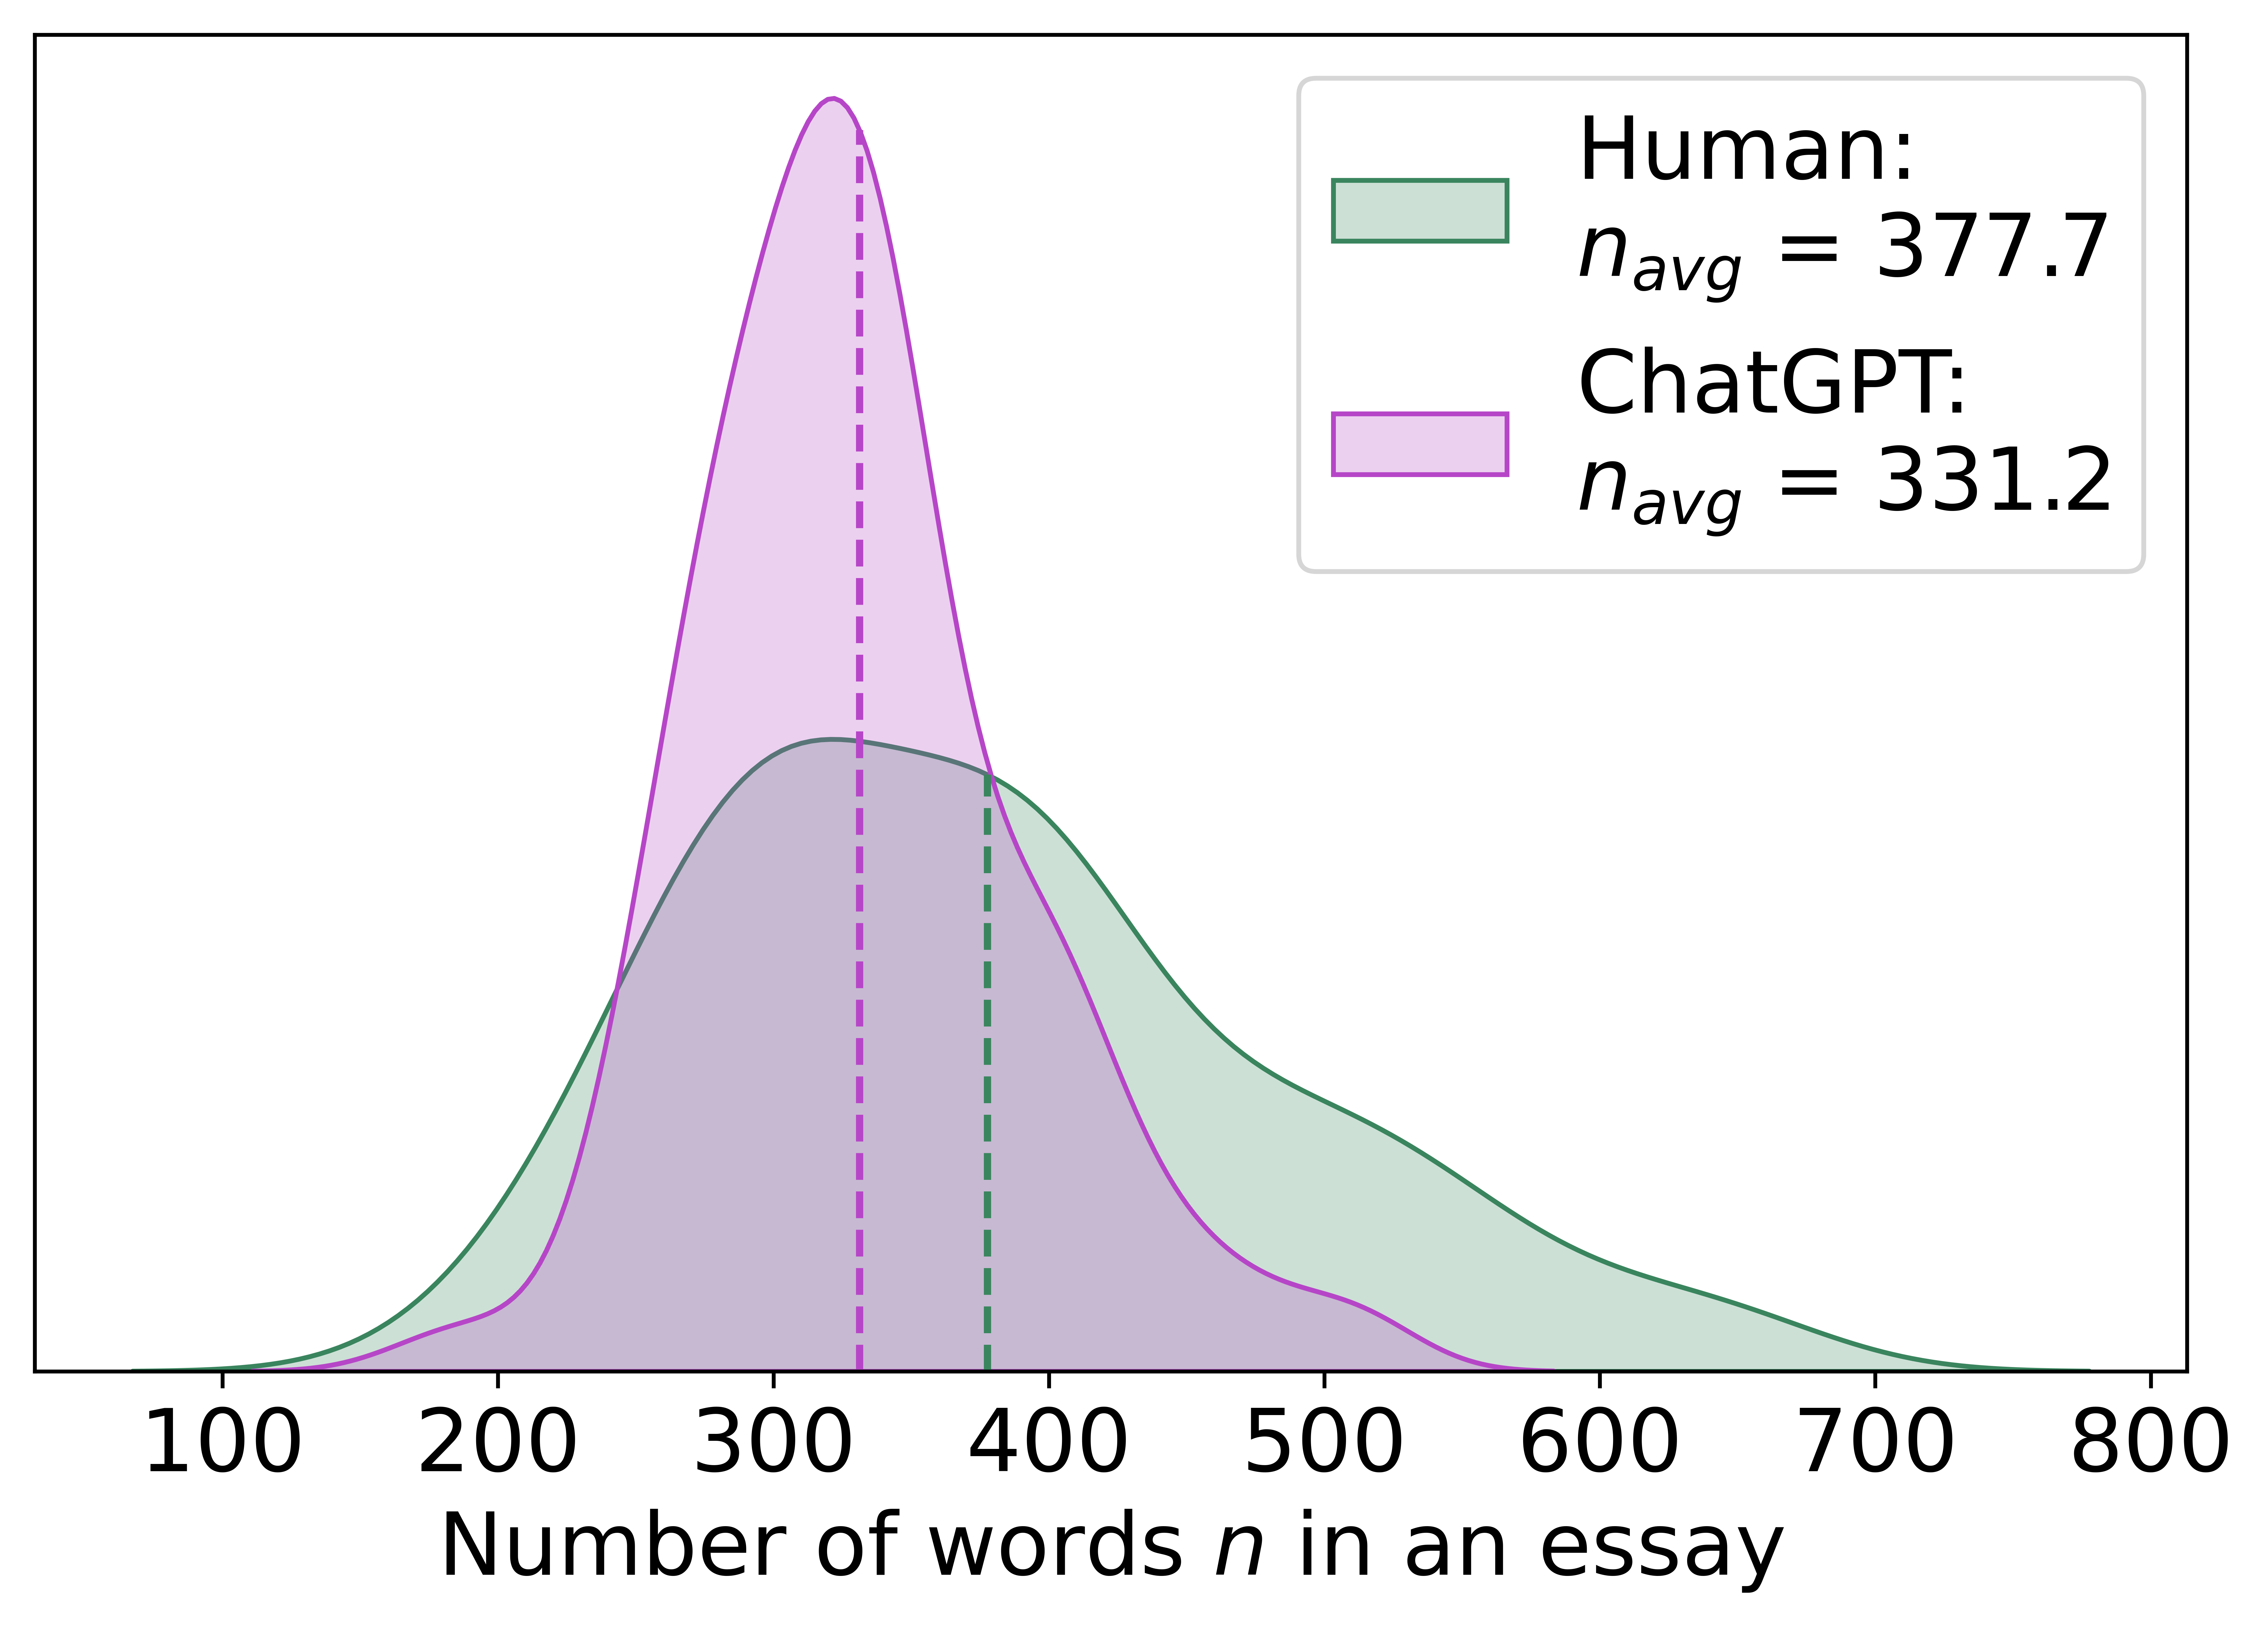

In [5]:
# Analyse the distribution of number of words in the essay per author

dataset["word_count"] = dataset["sentence"].apply(lambda x: len(str(x).split()))
word_counts = dataset[["author", "word_count", "essay_id"]]
word_counts = word_counts.groupby(["author", "essay_id"], as_index=False)["word_count"].sum()

x_axis_title = r"Number of words $n$ in an essay"
kde_plots(
    data=word_counts,
    x_axis="word_count",
    label_letter="n",
    x_axis_title=x_axis_title,
    output_file="word_count_distribution.pdf",
    font_size=18
)

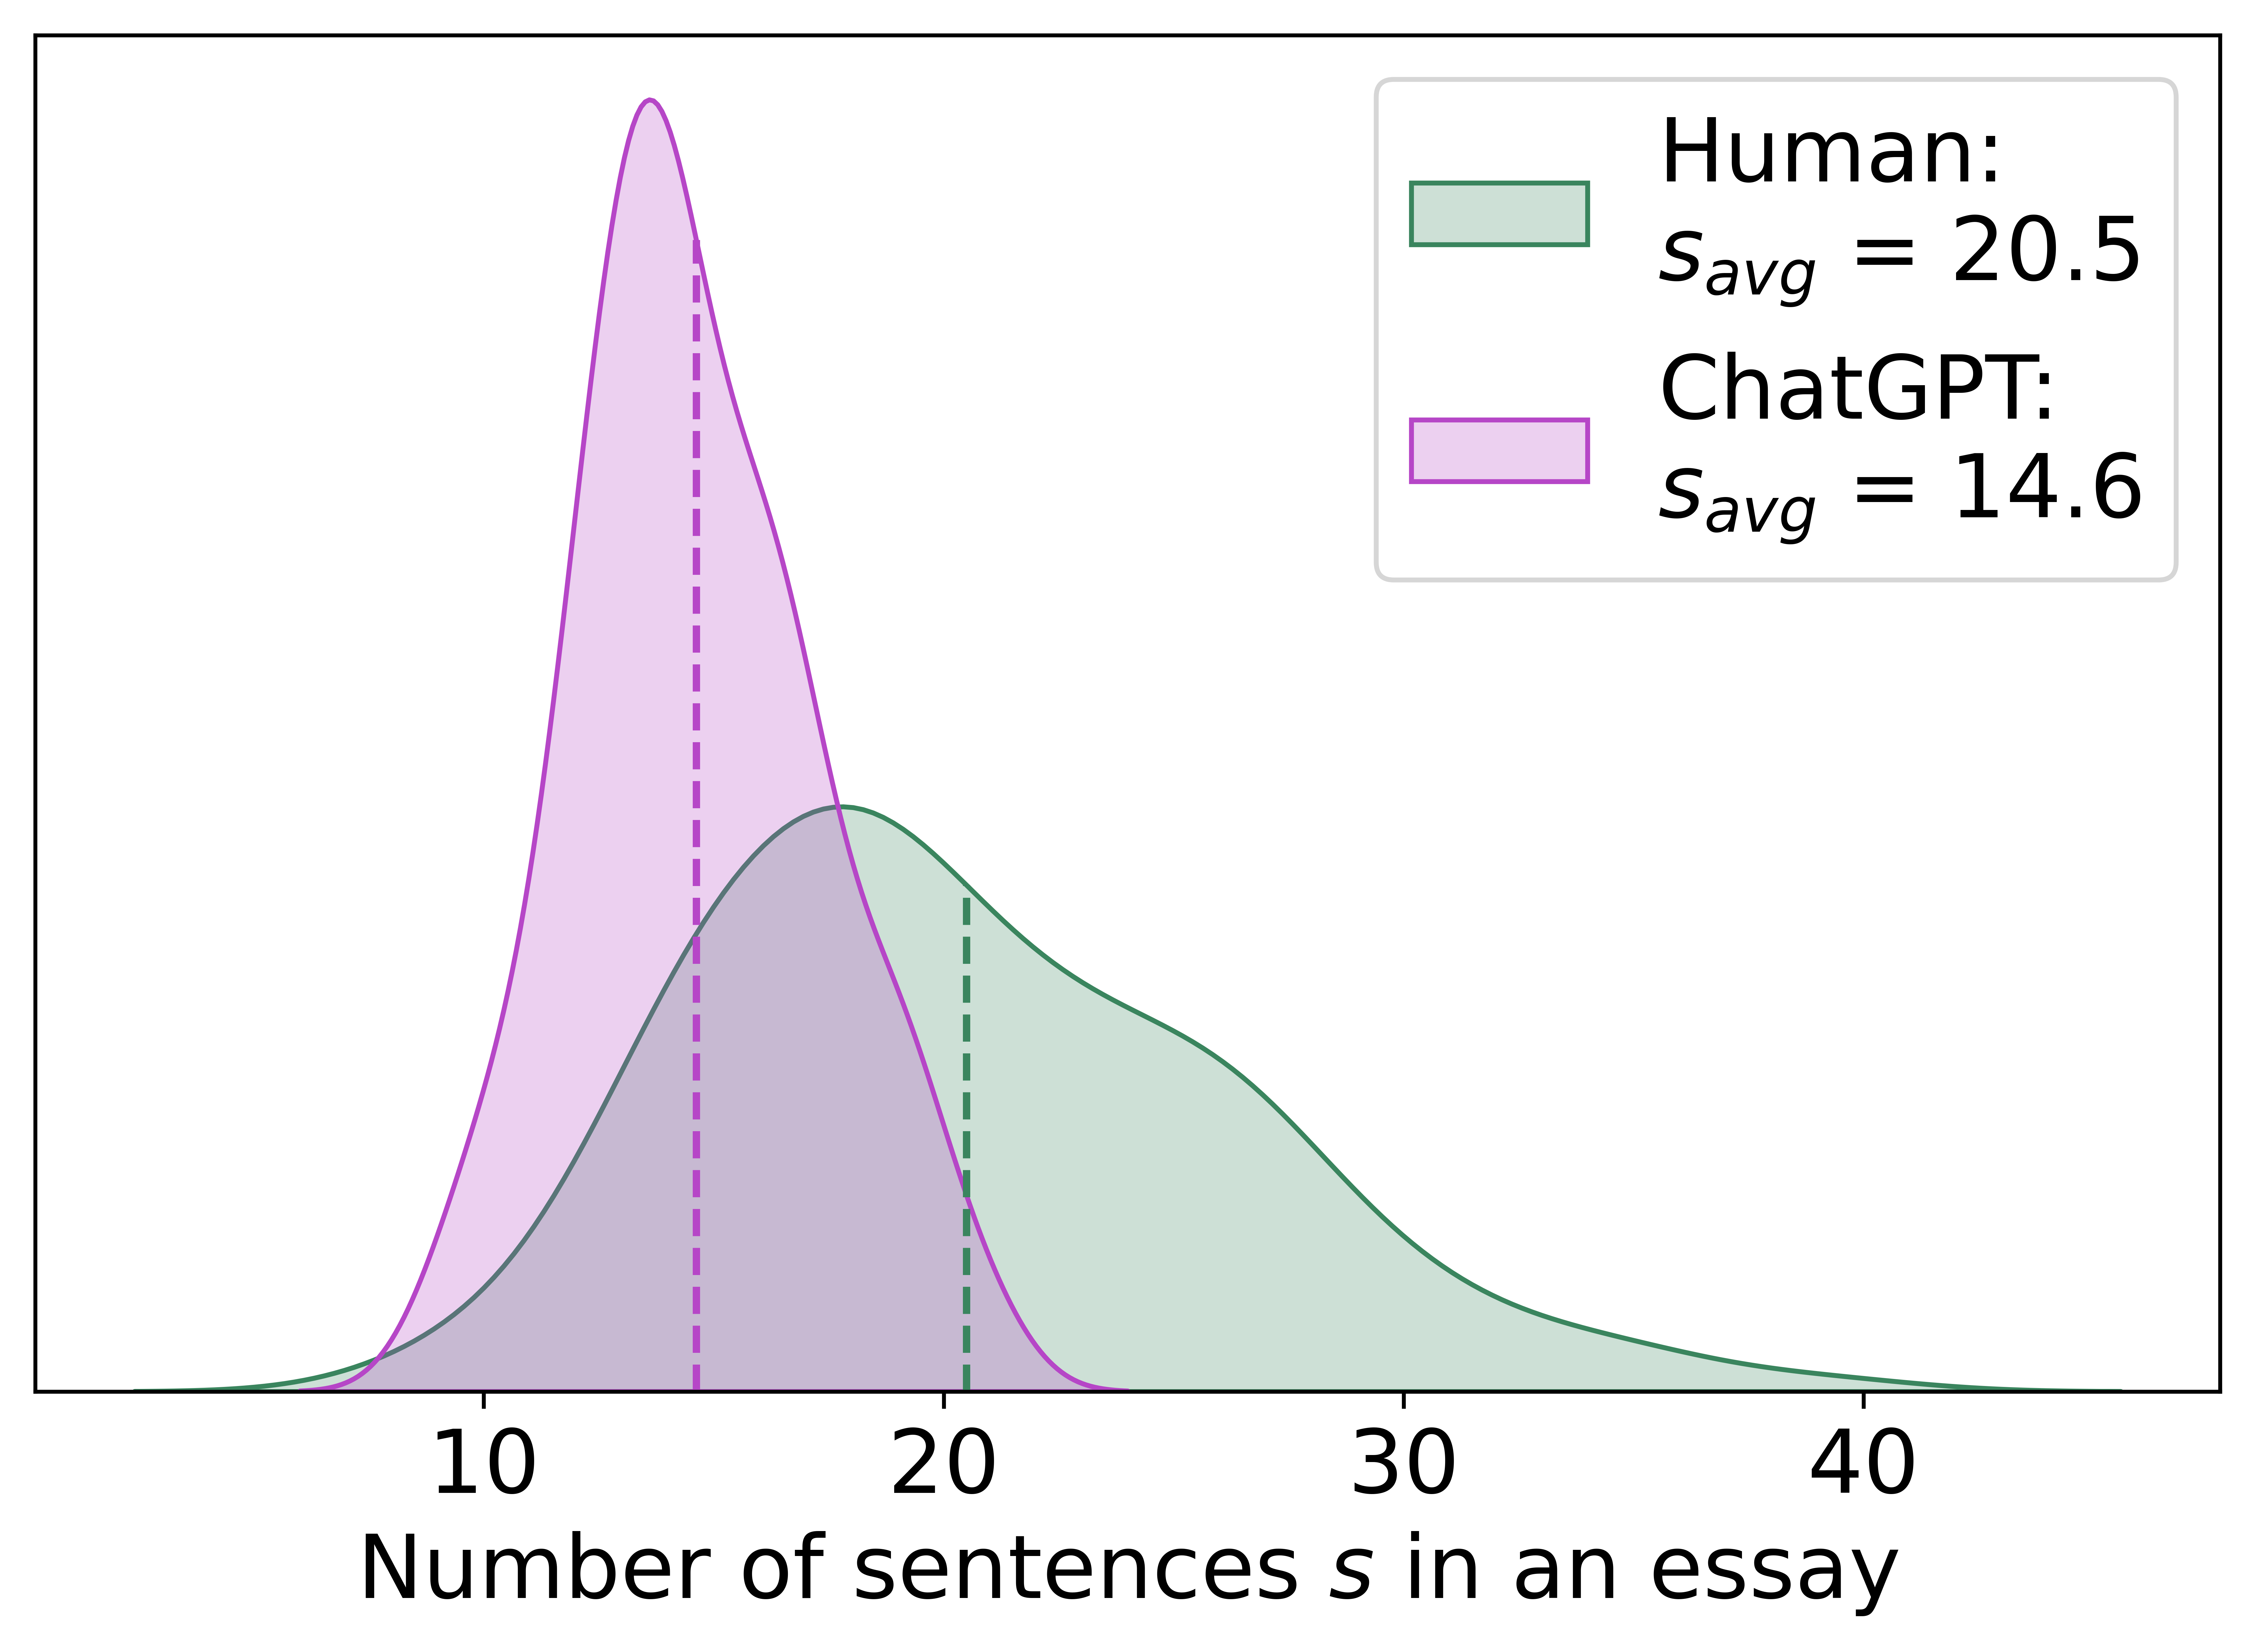

In [6]:
# Analyse the distribution of the number of sentences in the essay per author
dataset["sentence_count"] = (
    dataset[["author", "sentence", "essay_id"]]
    .groupby(["author", "essay_id"])["sentence"]
    .transform("count")
)
sentence_counts = dataset[["author", "sentence_count", "essay_id"]].drop_duplicates()

x_axis_title = r"Number of sentences $s$ in an essay"
kde_plots(
    data=sentence_counts,
    x_axis="sentence_count",
    label_letter="s",
    x_axis_title=x_axis_title,
    output_file="sentence_count_distribution.pdf",
    font_size=18
)